<a href="https://colab.research.google.com/github/am2644/Road-Accidents-Data--2022/blob/main/Road_Accidents_Data_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
Description:
This comprehensive dataset provides detailed information on road accidents reported over multiple years. The dataset encompasses various attributes related to accident status, vehicle and casualty references, demographics, and severity of casualties. It includes essential factors such as pedestrian details, casualty types, road maintenance worker involvement, and the Index of Multiple Deprivation (IMD) decile for casualties' home areas.

Columns:

* Status: The status of the accident (e.g., reported, under investigation).
* Accident_Index: A unique identifier for each reported accident.
* Accident_Year: The year in which the accident occurred.
* Accident_Reference: A reference number associated with the accident.
* Vehicle_Reference: A reference number for the involved vehicle in the accident.
* Casualty_Reference: A reference number for the casualty involved in the accident.
* Casualty_Class: Indicates the class of the casualty (e.g., driver, passenger, pedestrian).
* Sex_of_Casualty: The gender of the casualty (male or female).
* Age_of_Casualty: The age of the casualty.
* Age_Band_of_Casualty: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).
* Casualty_Severity: The severity of the casualty's injuries (e.g., fatal, serious, slight).
* Pedestrian_Location: The location of the pedestrian at the time of the accident.
* Pedestrian_Movement: The movement of the pedestrian during the accident.
* Car_Passenger: Indicates whether the casualty was a car passenger at the time of the accident (yes or no).
* Bus_or_Coach_Passenger: Indicates whether the casualty was a bus or coach passenger (yes or no).
* Pedestrian_Road_Maintenance_Worker: Indicates whether the casualty was a road maintenance worker (yes or no).
* Casualty_Type: The type of casualty (e.g., driver/rider, passenger, pedestrian).
* Casualty_Home_Area_Type: The type of area in which the casualty resides (e.g., urban, rural).
* Casualty_IMD_Decile: The IMD decile of the area where the casualty resides (a measure of deprivation).
* LSOA_of_Casualty: The Lower Layer Super Output Area (LSOA) associated with the casualty's location.



This dataset provides valuable insights for analyzing road accidents, identifying trends, and implementing safety measures to reduce casualties and enhance road safety. Researchers, policymakers, and analysts can leverage this dataset for evidence-based decision-making and improving overall road transportation systems.

In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Enabling iterative imputer in scikit-learn
from sklearn.experimental import enable_iterative_imputer

# Importing imputation methods from scikit-learn
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Importing RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


In [18]:
# Reading the CSV file into a DataFrame
df = pd.read_csv(
    'dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv'
)

# Sampling 6 random rows and transposing the DataFrame
df.sample(6).T

,58259,40439,14026,42625,37574,3550
status,Unvalidated,Unvalidated,Unvalidated,Unvalidated,Unvalidated,Unvalidated
accident_index,2022131183556,2022010382100,2022461195111,2022471139346,2022010359767,2022991172265
accident_year,2022,2022,2022,2022,2022,2022
accident_reference,131183556,010382100,461195111,471139346,010359767,991172265
vehicle_reference,2,1,1,2,3,1
casualty_reference,1,1,1,1,4,1
casualty_class,2,2,1,1,2,1
sex_of_casualty,1,2,1,1,2,2
age_of_casualty,16,90,24,30,80,37
age_band_of_casualty,4,11,5,6,11,7


In [19]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

# Data Preprocessing
Having -1 values in some columns likely indicates missing or unknown data. In many datasets, -1 is used as a placeholder or indicator for missing values, especially in categorical or ordinal variables where using NaN (Not a Number) might not be appropriate.

In [20]:
# Replacing all occurrences of -1 with NaN
df = df.replace(-1, np.nan)

# Replacing all occurrences of '-1' with NaN
df = df.replace('-1', np.nan)

Remove Redundant Columns

In [21]:
# List of columns to be removed from the DataFrame
columns_to_remove = ['status', 'accident_year', 'accident_reference',
                     'casualty_type', 'lsoa_of_casualty']

# Explanation for each column removal:
# 1. Redundant column: All records have the same status, making it redundant for analysis.
# 2. Lack of variability: All accidents are recorded in the same year (2022),
#    so this column doesn't provide useful information for analysis.
# 3. Redundant column: Accident_Index already serves as the unique identifier
#    for each accident.
# 4. Ambiguity or lack of meaningfulness: Casualty_Class already provides
#    information about the class of the casualty, and the values in this column
#    are not consistently meaningful.

# Extracting the 'lsoa_of_casualty' column before dropping other columns
lsoa = df['lsoa_of_casualty']

# Dropping specified columns from the DataFrame
df.drop(columns=columns_to_remove, inplace=True)

# Displaying information about the DataFrame after column removal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   accident_index                      61352 non-null  object 
 1   vehicle_reference                   61352 non-null  int64  
 2   casualty_reference                  61352 non-null  int64  
 3   casualty_class                      61352 non-null  int64  
 4   sex_of_casualty                     60904 non-null  float64
 5   age_of_casualty                     60002 non-null  float64
 6   age_band_of_casualty                60002 non-null  float64
 7   casualty_severity                   61352 non-null  int64  
 8   pedestrian_location                 61352 non-null  int64  
 9   pedestrian_movement                 61352 non-null  int64  
 10  car_passenger                       61038 non-null  float64
 11  bus_or_coach_passenger              61329

In [22]:
# Creating a new DataFrame with rows containing any NaN values dropped,
# and resetting the index to maintain a continuous index range
df_deleted = df.dropna().reset_index(drop=True)

# Displaying the shape (number of rows and columns) of the new DataFrame
df_deleted.shape

(54290, 15)

In [23]:
# Creating a copy of the DataFrame with dropped NaN values
df_missing_values = df_deleted.copy()

# Calculating the proportion of missing values in each column
missing_proportion = df.isnull().mean()

# Introducing missing values in 'df_deleted' based on the proportion of missing values in each column in 'df'
for column in df_missing_values.columns:
    # Calculate the number of missing values to introduce in each column of 'df_deleted'
    num_missing = int(np.round(missing_proportion[column] * len(df_missing_values)))
    # Randomly select indices within each column and replace corresponding values with NaN
    random_indices = np.random.choice(len(df_missing_values), num_missing, replace=False)
    df_missing_values.loc[random_indices, column] = np.nan

In [24]:
# Displaying information about the DataFrame with missing values introduced
df_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54290 entries, 0 to 54289
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   accident_index                      54290 non-null  object 
 1   vehicle_reference                   54290 non-null  float64
 2   casualty_reference                  54290 non-null  float64
 3   casualty_class                      54290 non-null  float64
 4   sex_of_casualty                     53894 non-null  float64
 5   age_of_casualty                     53095 non-null  float64
 6   age_band_of_casualty                53095 non-null  float64
 7   casualty_severity                   54290 non-null  float64
 8   pedestrian_location                 54290 non-null  float64
 9   pedestrian_movement                 54290 non-null  float64
 10  car_passenger                       54012 non-null  float64
 11  bus_or_coach_passenger              54270

In [25]:
# Extracting columns with missing values
missing_cols = df_missing_values.columns[df_missing_values.isnull().any()]

# Initialize a list to store the indices of missing values for each column
miss_indices = []

# Iterating over columns with missing values
for col in missing_cols:
    # Finding indices of missing values in the current column
    missing_indices = df_missing_values.index[df_missing_values[col].isnull()]
    # Appending the missing indices to the list
    miss_indices.append(missing_indices)

In [ ]:
# Initialize imputers
imputers = {
    'most_frequent': SimpleImputer(strategy='most_frequent'),
    # Imputer for filling missing values with most frequent value
    'knn': KNNImputer(),  # Imputer using k-nearest neighbors algorithm
    'iterative_rfc': IterativeImputer(estimator=RandomForestClassifier())
    # Imputer using iterative approach with RandomForestClassifier
}

# Initialize dictionary to store accuracy for each column and imputer
accuracy_dict = {col: {imputer_name: [] for imputer_name in imputers} for col in missing_cols}

# Apply imputation methods and calculate accuracy for each
for imputer_name, imputer in imputers.items():
    # Impute missing values
    df_imputed = df_missing_values.copy()  # Copying the DataFrame
    df_imputed[missing_cols] = imputer.fit_transform(df_imputed[missing_cols])  # Applying imputation

    # Calculate accuracy for each column
    i = 0
    for col in missing_cols:
        # Get original and imputed values for the current column
        original_values = df_deleted.loc[df_deleted.index.isin(miss_indices[i]), col]
        imputed_values = df_imputed.loc[df_imputed.index.isin(miss_indices[i]), col]

        # Calculate exact match accuracy
        exact_match_accuracy = sum(x == y for x, y in zip(original_values, imputed_values)) / len(original_values)

        # Store accuracy in the dictionary
        accuracy_dict[col][imputer_name] = exact_match_accuracy
        i += 1

# Convert accuracy_dict to DataFrame for easy plotting
accuracy_df = pd.DataFrame(accuracy_dict).T




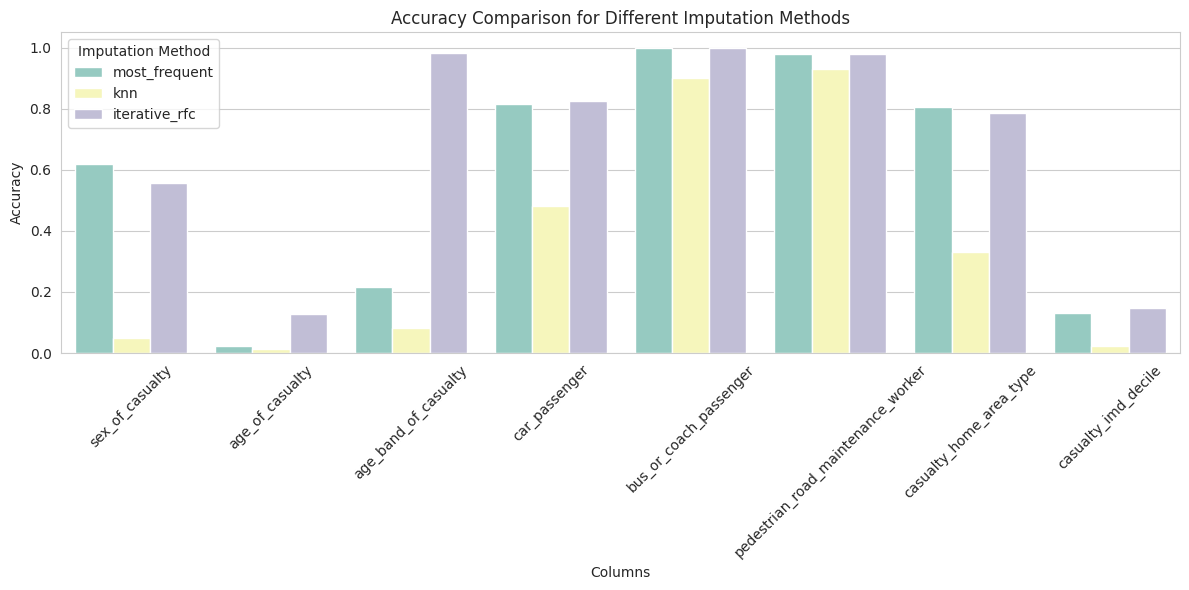

In [27]:
# Plotting with Seaborn
plt.figure(figsize=(12, 6))  # Setting figure size
sns.set_style("whitegrid")  # Setting seaborn style

# Melt the DataFrame to have a long format suitable for bar plot
accuracy_df_melted = accuracy_df.reset_index().melt(id_vars='index', var_name='Imputation Method',
                                                    value_name='Accuracy')

# Creating a bar plot
sns.barplot(data=accuracy_df_melted, x='index', y='Accuracy', hue='Imputation Method', palette="Set3")

# Adding title and labels
plt.title("Accuracy Comparison for Different Imputation Methods")
plt.xlabel("Columns")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend(title='Imputation Method')  # Adding legend with title
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot



I used three imputation methods: KNN imputer, Simple imputer, and Iterative imputer. As you can see, the Simple and Iterative methods perform better. However, in some columns, they fail to generate correct values. For the rest of the notebook, I utilized the dataset from which I deleted missing values.

# Extract Meaningfull Information

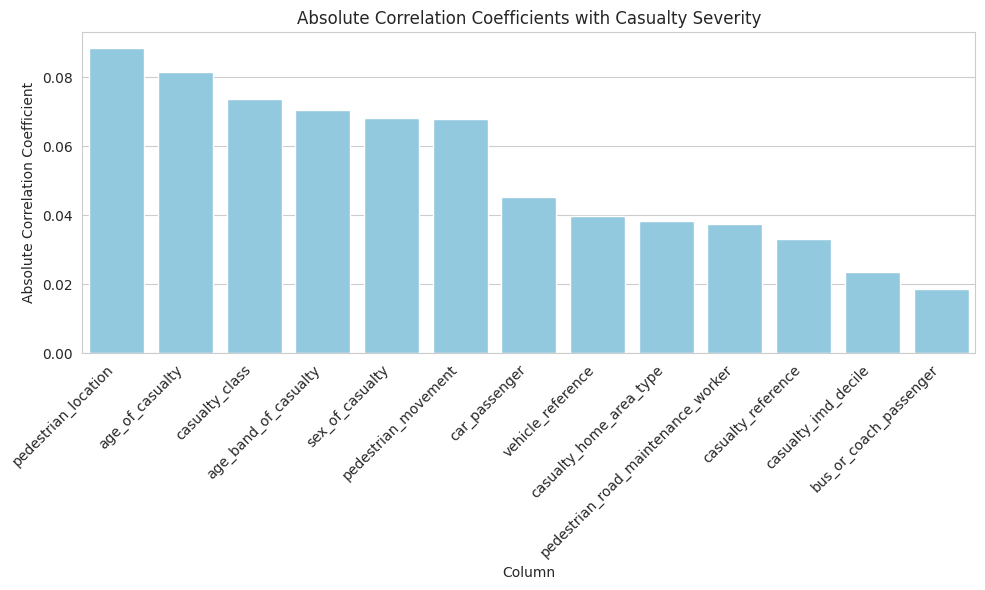

In [72]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df_deleted.corr()

# Extract the row corresponding to casualty_severity and drop the casualty_severity column
severity_correlation = correlation_matrix.loc['casualty_severity'].drop('casualty_severity')

# Get the absolute values of the correlation coefficients
severity_correlation_abs = severity_correlation.abs()

# Sort the absolute correlation coefficients in descending order
severity_correlation_sorted = severity_correlation_abs.sort_values(ascending=False)

# Plot the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_correlation_sorted.index, y=severity_correlation_sorted.values, color='skyblue')
plt.xlabel('Column')
plt.ylabel('Absolute Correlation Coefficient')
plt.title('Absolute Correlation Coefficients with Casualty Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As you can see, there is no strong correlation between Casualty Severity and other columns. However, based on the information we have, we can still analyze our data.

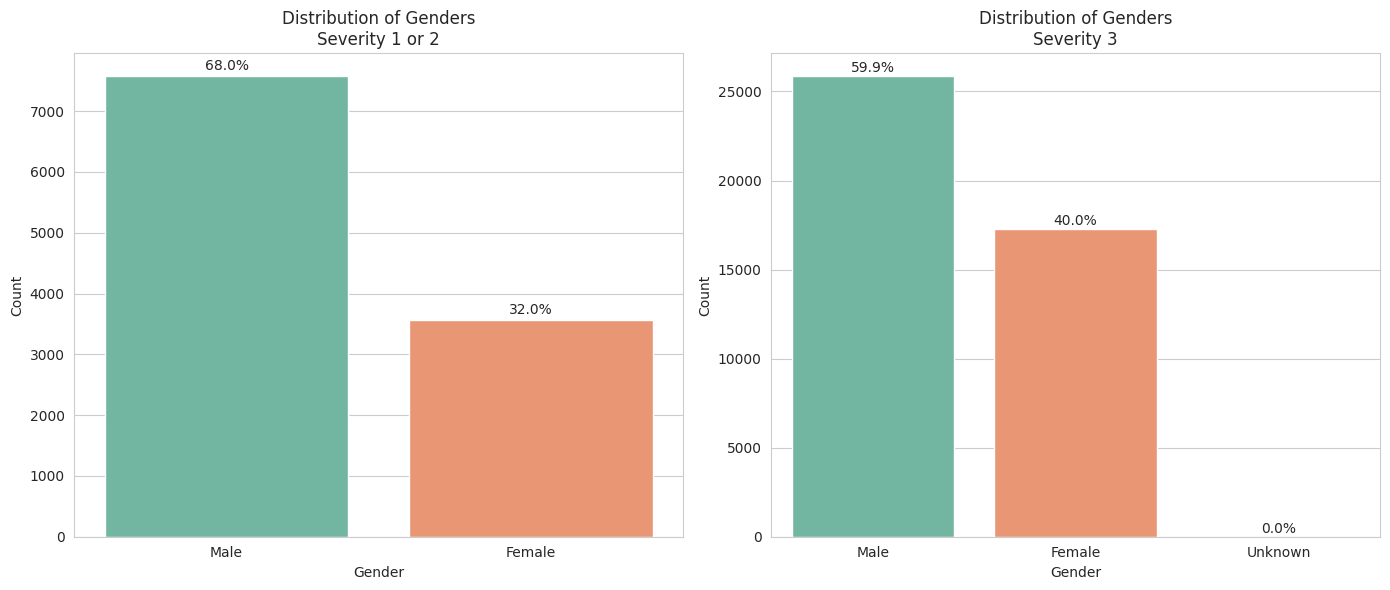

In [73]:
# Define gender labels
gender_labels = {1: 'Male', 2: 'Female', 9: 'Unknown'}

# Filter data for casualty_severity 1 or 2
df_severity_1_2 = df_deleted[df_deleted['casualty_severity'].isin([1, 2])]

# Filter data for casualty_severity 3
df_severity_3 = df_deleted[df_deleted['casualty_severity'] == 3]

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Plot for casualty_severity 1 or 2
plt.subplot(1, 2, 1)
sns.countplot(x='sex_of_casualty', data=df_severity_1_2.replace({'sex_of_casualty': gender_labels}), palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders\nSeverity 1 or 2')

# Add percentage annotations for casualty_severity 1 or 2
total_1_2 = len(df_severity_1_2)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 50, '{:.1f}%'.format(height / total_1_2 * 100),
                   ha='center', va='bottom', fontsize=10)

# Specify order of categories for the second plot
order = ['Male', 'Female', 'Unknown']

# Plot for casualty_severity 3
plt.subplot(1, 2, 2)
sns.countplot(x='sex_of_casualty', data=df_severity_3.replace({'sex_of_casualty': gender_labels}), order=order,
              palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders\nSeverity 3')

# Add percentage annotations for casualty_severity 3
total_3 = len(df_severity_3)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 50, '{:.1f}%'.format(height / total_3 * 100),
                   ha='center', va='bottom', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


As we can see, men are more involved in fatal and serious accidents.

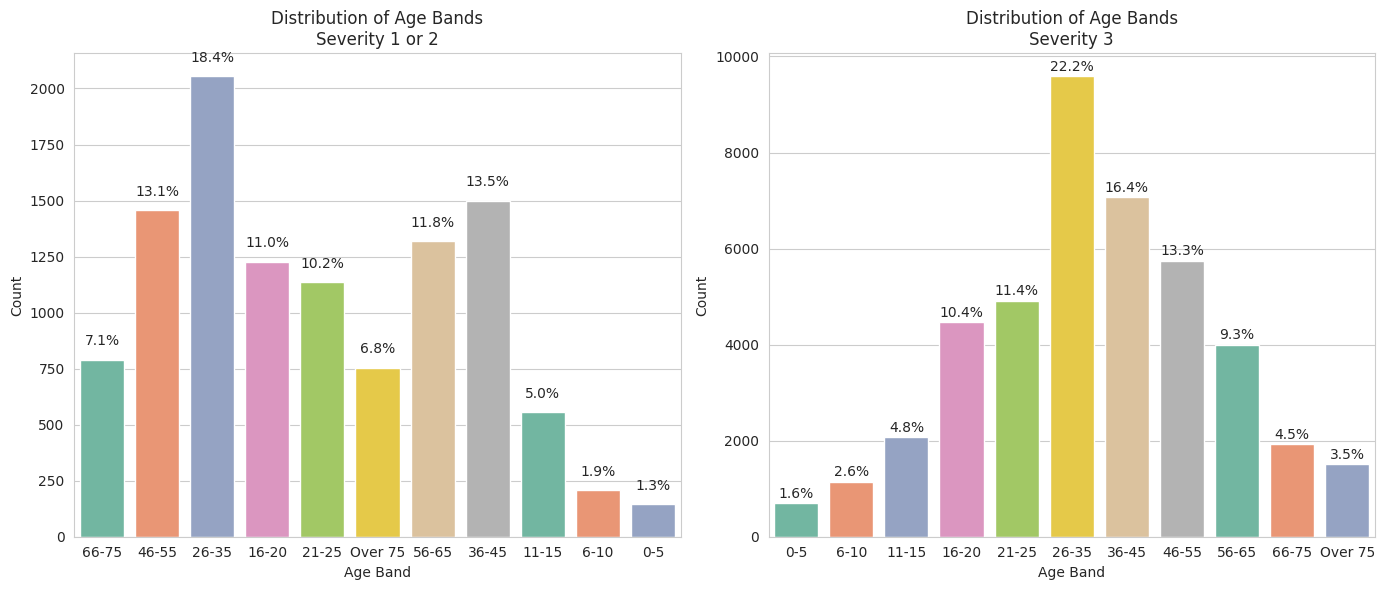

In [83]:
# Define age band labels
age_band_labels = {1: '0-5', 2: '6-10', 3: '11-15', 4: '16-20', 5: '21-25',
                   6: '26-35', 7: '36-45', 8: '46-55', 9: '56-65', 10: '66-75',
                   11: 'Over 75'}

# Filter data for casualty_severity 1 or 2
df_severity_1_2 = df_deleted[df_deleted['casualty_severity'].isin([1, 2])]

# Filter data for casualty_severity 3
df_severity_3 = df_deleted[df_deleted['casualty_severity'] == 3]

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Plot for casualty_severity 1 or 2
plt.subplot(1, 2, 1)
sns.countplot(x='age_band_of_casualty', data=df_severity_1_2.replace({'age_band_of_casualty': age_band_labels}),
              palette='Set2')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.title('Distribution of Age Bands\nSeverity 1 or 2')

# Add percentage annotations for casualty_severity 1 or 2
total_1_2 = len(df_severity_1_2)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 50, '{:.1f}%'.format(height / total_1_2 * 100),
                   ha='center', va='bottom', fontsize=10)

# Specify order of categories for the second plot
order = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66-75', 'Over 75']

# Plot for casualty_severity 3
plt.subplot(1, 2, 2)
sns.countplot(x='age_band_of_casualty', data=df_severity_3.replace({'age_band_of_casualty': age_band_labels}),
              order=order, palette='Set2')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.title('Distribution of Age Bands\nSeverity 3')

# Add percentage annotations for casualty_severity 3
total_3 = len(df_severity_3)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 50, '{:.1f}%'.format(height / total_3 * 100),
                   ha='center', va='bottom', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


And we could observe the effect of Age Band on severity.

Pedestrian Location Labels:
1: Crossing on pedestrian crossing facility
2: Crossing in zig-zag approach lines
3: Crossing in zig-zag exit lines
4: Crossing elsewhere within 50m. of pedestrian crossing
5: In carriageway, crossing elsewhere
6: On footway or verge
7: On refuge, central island or central reservation
8: In centre of carriageway - not on refuge, island or central reservation
9: In carriageway, not crossing
10: Unknown or other


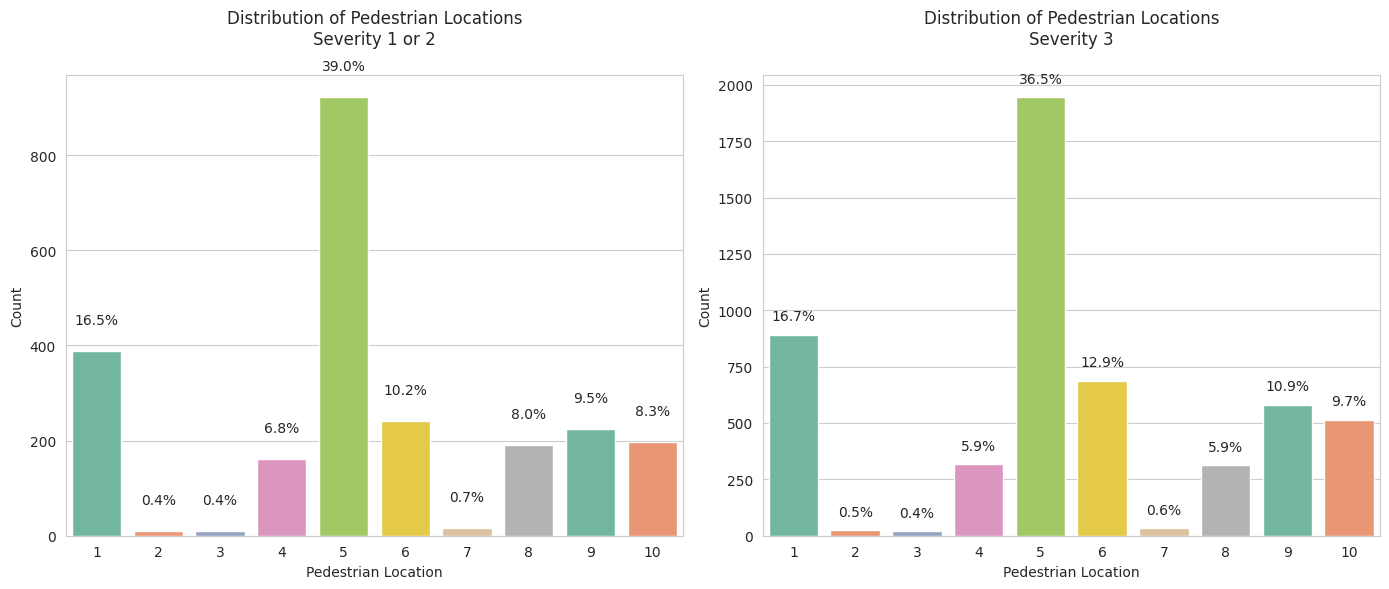

In [82]:
# Define pedestrian location labels
pedestrian_location_labels = {
    1: 'Crossing on pedestrian crossing facility',
    2: 'Crossing in zig-zag approach lines',
    3: 'Crossing in zig-zag exit lines',
    4: 'Crossing elsewhere within 50m. of pedestrian crossing',
    5: 'In carriageway, crossing elsewhere',
    6: 'On footway or verge',
    7: 'On refuge, central island or central reservation',
    8: 'In centre of carriageway - not on refuge, island or central reservation',
    9: 'In carriageway, not crossing',
    10: 'Unknown or other'
}

# Filter data for pedestrian locations excluding "Not a Pedestrian"
df_pedestrian = df_deleted[df_deleted['pedestrian_location'] != 0]

# Filter data for casualty_severity 1 or 2
df_severity_1_2 = df_pedestrian[df_pedestrian['casualty_severity'].isin([1, 2])]

# Filter data for casualty_severity 3
df_severity_3 = df_pedestrian[df_pedestrian['casualty_severity'] == 3]

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Plot for casualty_severity 1 or 2
plt.subplot(1, 2, 1)
sns.countplot(x='pedestrian_location', data=df_severity_1_2, palette='Set2', order=range(1, 11))
plt.xlabel('Pedestrian Location')
plt.ylabel('Count')
plt.title('Distribution of Pedestrian Locations\nSeverity 1 or 2', y=1.05)  # Adjust the y parameter
# Add percentage annotations for casualty_severity 1 or 2
total_1_2 = len(df_severity_1_2)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 50, '{:.1f}%'.format(height / total_1_2 * 100),
                   ha='center', va='bottom', fontsize=10)

# Plot for casualty_severity 3
plt.subplot(1, 2, 2)
sns.countplot(x='pedestrian_location', data=df_severity_3, palette='Set2', order=range(1, 11))
plt.xlabel('Pedestrian Location')
plt.ylabel('Count')
plt.title('Distribution of Pedestrian Locations\nSeverity 3', y=1.05)  # Adjust the y parameter
# Add percentage annotations for casualty_severity 3
total_3 = len(df_severity_3)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 50, '{:.1f}%'.format(height / total_3 * 100),
                   ha='center', va='bottom', fontsize=10)

# Print the pedestrian location labels as a guide
print("Pedestrian Location Labels:")
for key, value in pedestrian_location_labels.items():
    print(f"{key}: {value}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()



Pedestrian location's effect

# Drivers role on casualty severity

<ipython-input-51-c60bf08332ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = drivers_df.corr()


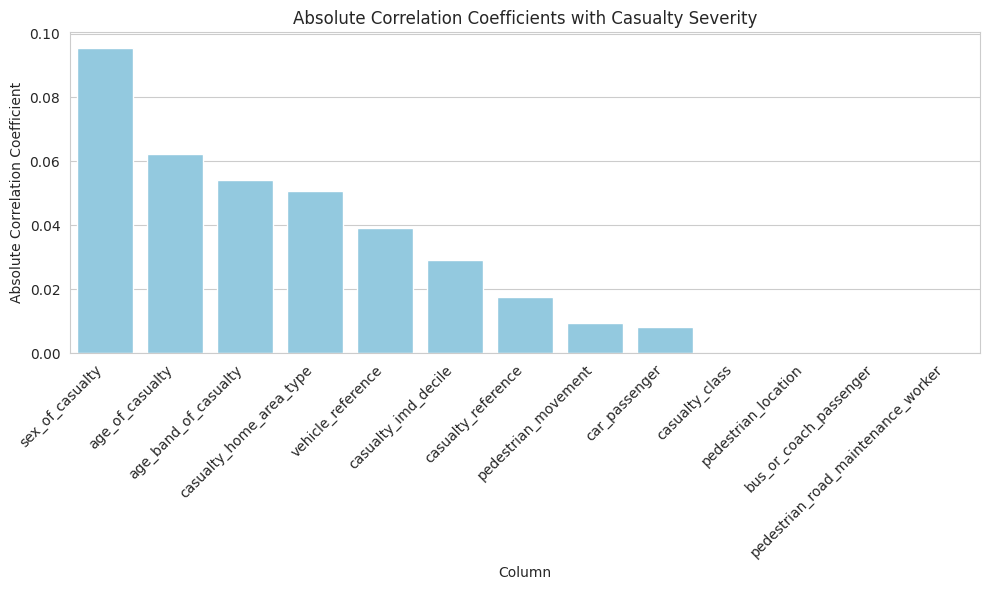

In [51]:
drivers_df = df_deleted[df_deleted['casualty_class'] == 1]
correlation_matrix = drivers_df.corr()

# Extract the row corresponding to casualty_severity and drop the casualty_severity column
severity_correlation = correlation_matrix.loc['casualty_severity'].drop('casualty_severity')

# Get the absolute values of the correlation coefficients
severity_correlation_abs = severity_correlation.abs()

# Sort the absolute correlation coefficients in descending order
severity_correlation_sorted = severity_correlation_abs.sort_values(ascending=False)

# Plot the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_correlation_sorted.index, y=severity_correlation_sorted.values, color='skyblue')
plt.xlabel('Column')
plt.ylabel('Absolute Correlation Coefficient')
plt.title('Absolute Correlation Coefficients with Casualty Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


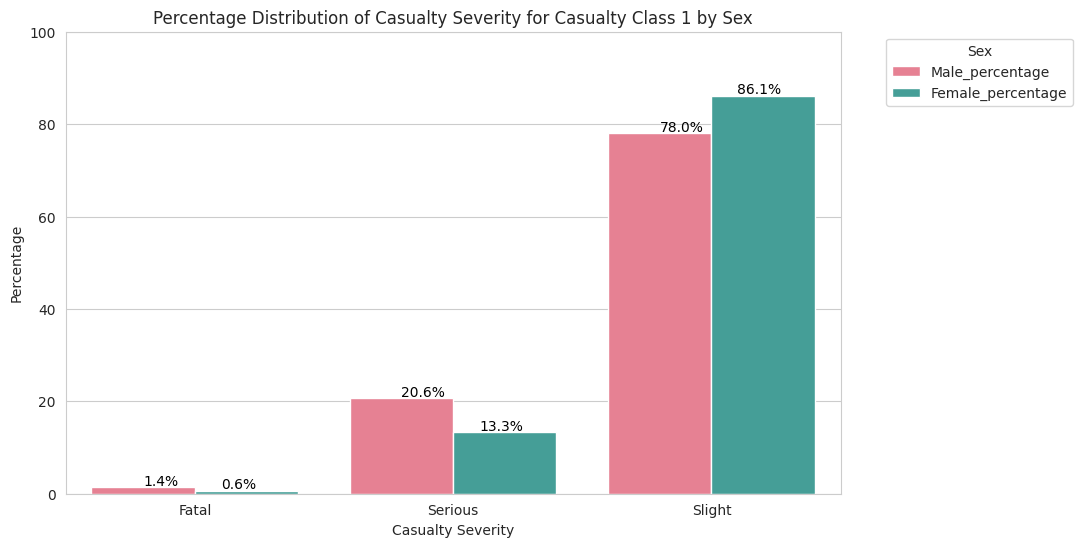

In [40]:
# Filter the DataFrame by casualty_class
drivers_df = df_deleted[df_deleted['casualty_class'] == 1]

# Filter the DataFrame by sex_of_casualty and count the values for each casualty_severity
severity_counts_male = drivers_df[drivers_df['sex_of_casualty'] == 1]['casualty_severity'].value_counts().sort_index()
severity_counts_female = drivers_df[drivers_df['sex_of_casualty'] == 2]['casualty_severity'].value_counts().sort_index()

# Create a DataFrame for easier manipulation
severity_data = pd.DataFrame({
    'Casualty Severity': ['Fatal', 'Serious', 'Slight'],
    'Male': severity_counts_male.values,
    'Female': severity_counts_female.values
})

# Calculate the total number of male and female casualties
total_male = severity_counts_male.sum()
total_female = severity_counts_female.sum()

# Calculate the percentage of male and female casualties for each severity level
severity_data['Male_percentage'] = (severity_data['Male'] / total_male) * 100
severity_data['Female_percentage'] = (severity_data['Female'] / total_female) * 100

# Melt the DataFrame to long format for seaborn
severity_data_melted = severity_data.melt(id_vars='Casualty Severity',
                                          value_vars=['Male_percentage', 'Female_percentage'],
                                          var_name='Sex',
                                          value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Casualty Severity', y='Percentage', hue='Sex', data=severity_data_melted, palette='husl')
plt.xlabel('Casualty Severity')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Casualty Severity for Casualty Class 1 by Sex')

# Add percentage labels
for index, row in severity_data.iterrows():
    plt.text(index - 0.2, row['Male_percentage'] + 0.5, f"{row['Male_percentage']:.1f}%", color='black', fontsize=10)
    plt.text(index + 0.1, row['Female_percentage'] + 0.5, f"{row['Female_percentage']:.1f}%", color='black',
             fontsize=10)

plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.show()



As expected, men are more involved in severe accidents, while women are more involved in slight accidents.

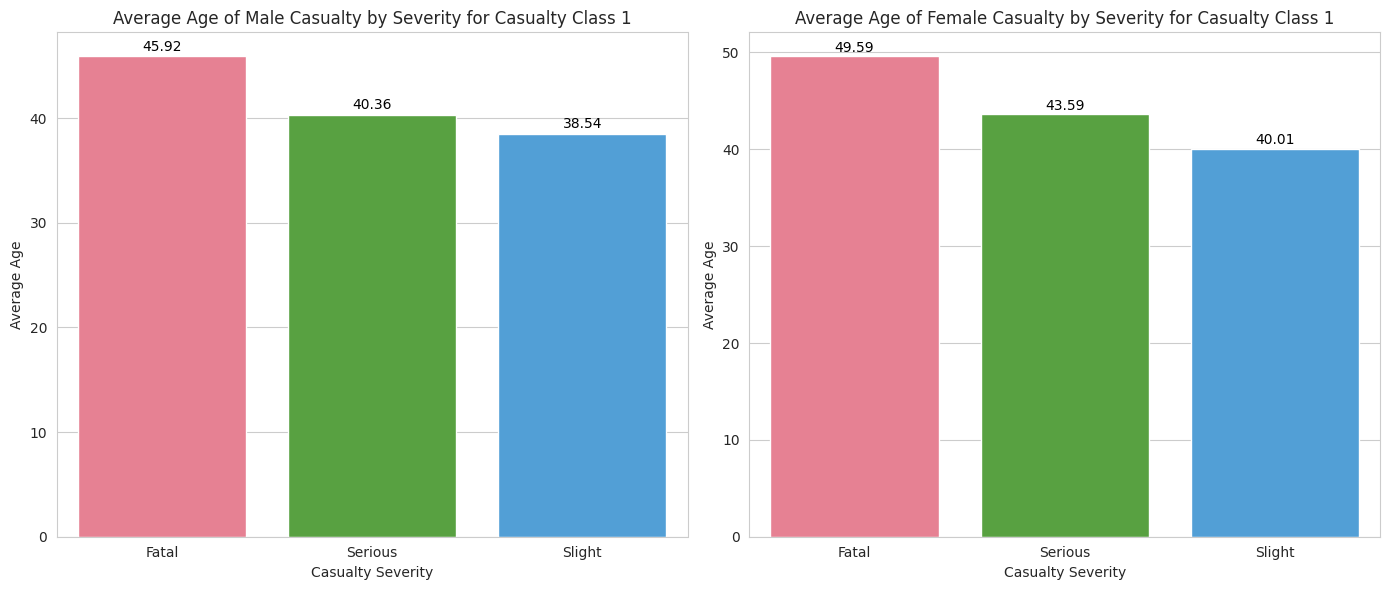

In [86]:
# Filter the DataFrame by casualty_class and sex_of_casualty
drivers_df = df_deleted[df_deleted['casualty_class'] == 1]

# Calculate the average age for each severity level for men and women separately
average_age_fatal_male = drivers_df[(drivers_df['sex_of_casualty'] == 1) & (drivers_df['casualty_severity'] == 1)][
    'age_of_casualty'].mean()
average_age_serious_male = drivers_df[(drivers_df['sex_of_casualty'] == 1) & (drivers_df['casualty_severity'] == 2)][
    'age_of_casualty'].mean()
average_age_slight_male = drivers_df[(drivers_df['sex_of_casualty'] == 1) & (drivers_df['casualty_severity'] == 3)][
    'age_of_casualty'].mean()

average_age_fatal_female = drivers_df[(drivers_df['sex_of_casualty'] == 2) & (drivers_df['casualty_severity'] == 1)][
    'age_of_casualty'].mean()
average_age_serious_female = drivers_df[(drivers_df['sex_of_casualty'] == 2) & (drivers_df['casualty_severity'] == 2)][
    'age_of_casualty'].mean()
average_age_slight_female = drivers_df[(drivers_df['sex_of_casualty'] == 2) & (drivers_df['casualty_severity'] == 3)][
    'age_of_casualty'].mean()

# Create DataFrames for easier manipulation
severity_age_data_male = pd.DataFrame({
    'Casualty Severity': ['Fatal', 'Serious', 'Slight'],
    'Average Age (Male)': [average_age_fatal_male, average_age_serious_male, average_age_slight_male]
})

severity_age_data_female = pd.DataFrame({
    'Casualty Severity': ['Fatal', 'Serious', 'Slight'],
    'Average Age (Female)': [average_age_fatal_female, average_age_serious_female, average_age_slight_female]
})

# Create the bar plots
plt.figure(figsize=(14, 6))

# Bar plot for male casualties
plt.subplot(1, 2, 1)
sns.barplot(x='Casualty Severity', y='Average Age (Male)', data=severity_age_data_male, palette='husl')
plt.xlabel('Casualty Severity')
plt.ylabel('Average Age')
plt.title('Average Age of Male Casualty by Severity for Casualty Class 1')

# Add value labels for male casualties
for index, row in severity_age_data_male.iterrows():
    plt.text(index, row['Average Age (Male)'] + 0.5, f"{row['Average Age (Male)']:.2f}", color='black', fontsize=10,
             ha='center')

plt.ylim(0, None)  # Adjust y-axis limit to start from 0

# Bar plot for female casualties
plt.subplot(1, 2, 2)
sns.barplot(x='Casualty Severity', y='Average Age (Female)', data=severity_age_data_female, palette='husl')
plt.xlabel('Casualty Severity')
plt.ylabel('Average Age')
plt.title('Average Age of Female Casualty by Severity for Casualty Class 1')

# Add value labels for female casualties
for index, row in severity_age_data_female.iterrows():
    plt.text(index, row['Average Age (Female)'] + 0.5, f"{row['Average Age (Female)']:.2f}", color='black', fontsize=10,
             ha='center')

plt.ylim(0, None)  # Adjust y-axis limit to start from 0

plt.tight_layout()
plt.show()


Contrary to my expectation, the average age of drivers involved in severe accidents is over 40.

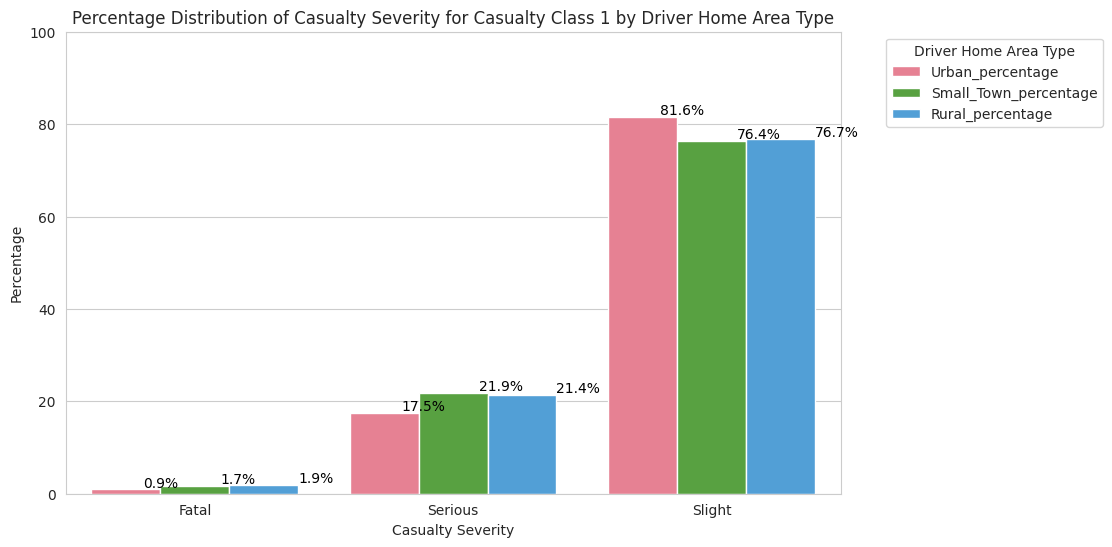

In [90]:
# Filter the DataFrame by casualty_class
drivers_df = df_deleted[df_deleted['casualty_class'] == 1]

# Filter the DataFrame by driver_home_area_type and count the values for each casualty_severity
severity_counts_urban = drivers_df[drivers_df['casualty_home_area_type'] == 1][
    'casualty_severity'].value_counts().sort_index()
severity_counts_small_town = drivers_df[drivers_df['casualty_home_area_type'] == 2][
    'casualty_severity'].value_counts().sort_index()
severity_counts_rural = drivers_df[drivers_df['casualty_home_area_type'] == 3][
    'casualty_severity'].value_counts().sort_index()

# Create a DataFrame for easier manipulation
severity_data = pd.DataFrame({
    'Casualty Severity': ['Fatal', 'Serious', 'Slight'],
    'Urban': severity_counts_urban.values,
    'Small Town': severity_counts_small_town.values,
    'Rural': severity_counts_rural.values
})

# Calculate the total number of casualties in each driver home area type
total_urban = severity_counts_urban.sum()
total_small_town = severity_counts_small_town.sum()
total_rural = severity_counts_rural.sum()

# Calculate the percentage of casualties for each severity level and driver home area type
severity_data['Urban_percentage'] = (severity_data['Urban'] / total_urban) * 100
severity_data['Small_Town_percentage'] = (severity_data['Small Town'] / total_small_town) * 100
severity_data['Rural_percentage'] = (severity_data['Rural'] / total_rural) * 100

# Melt the DataFrame to long format for seaborn
severity_data_melted = severity_data.melt(id_vars='Casualty Severity',
                                          value_vars=['Urban_percentage', 'Small_Town_percentage', 'Rural_percentage'],
                                          var_name='Driver Home Area Type',
                                          value_name='Percentage')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Casualty Severity', y='Percentage', hue='Driver Home Area Type', data=severity_data_melted,
            palette='husl')
plt.xlabel('Casualty Severity')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Casualty Severity for Casualty Class 1 by Driver Home Area Type')

# Add percentage labels
for index, row in severity_data.iterrows():
    plt.text(index - 0.2, row['Urban_percentage'] + 0.5, f"{row['Urban_percentage']:.1f}%", color='black', fontsize=10)
    plt.text(index + 0.1, row['Small_Town_percentage'] + 0.5, f"{row['Small_Town_percentage']:.1f}%", color='black',
             fontsize=10)
    plt.text(index + 0.4, row['Rural_percentage'] + 0.5, f"{row['Rural_percentage']:.1f}%", color='black', fontsize=10)

plt.legend(title='Driver Home Area Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.show()


Most slight accidents occurred in urban areas, whereas severe accidents predominantly happened in small towns and rural areas.

# Breakdown
* Analysis of casualty severity reveals distinct gender patterns, with men being more involved in fatal and serious accidents.
* Contrary to expectations, the average age of drivers in severe accidents exceeds 40 years.
* Pedestrian location significantly influences accident severity, with certain areas experiencing higher rates of severe accidents.
* Age bands also demonstrate an impact on accident severity, highlighting varying risk profiles across different age groups.
Urban areas are associated with a higher frequency of slight accidents, indicating potential factors such as congestion or pedestrian density.
* Conversely, small towns and rural areas see a higher incidence of severe accidents, suggesting different risk factors at play.
* Imputation methods such as KNN, Simple, and Iterative are utilized to handle missing data, with varying effectiveness across different columns.
* Despite challenges in generating accurate values for some columns, analysis of the dataset is still feasible.
Further investigation is warranted to understand the underlying factors contributing to the observed patterns in casualty severity and accident locations.
* These insights can inform targeted interventions and policies aimed at reducing road accidents and improving overall safety outcomes.

To achieve better results in analyzing road accident severity, additional data points would be invaluable. Including weather conditions related to the accident, such as visibility and road conditions, could provide deeper insights. Furthermore, detailed information regarding the time of the accident— including the month, date, and hour— would enhance our understanding of temporal patterns and potential contributing factors. Similarly, more precise location data, including street names and geographic coordinates, would allow for more granular analysis of accident hotspots and risk factors. In summary, analyzing road accident severity is a complex and crucial task that necessitates comprehensive and clear information to yield meaningful insights.